In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
river_data = pd.read_csv('새만금하천수질지표.csv', encoding='cp949')

In [3]:
def cal_river_pH(q):
    if q > 6.5 and q <= 8.5:
        pollution = 1
    elif q > 6.0 and q <= 6.5:
        pollution = 5
    else:
        pollution = False
    return pollution

In [4]:
def cal_river_BOD(q):
    if q <= 1:
        pollution = 1
    elif q <= 2:
        pollution = 2
    elif q <= 3:
        pollution = 3
    elif q <= 5:
        pollution = 4
    elif q <= 8:
        pollution = 5
    elif q <= 10:
        pollution = 6
    elif q > 10:
        pollution = 7
    return pollution

In [5]:
def cal_river_SS(q):
    if q <= 25:
        pollution = 1
    elif q <= 100:
        pollution = 5
    else:
        pollution = False
    return pollution

In [6]:
def cal_river_DO(q):
    if q >= 7.5:
        pollution = 1
    elif q >= 5.0:
        pollution = 2
    elif q >= 2.0:
        pollution = 5
    elif q < 2.0:
        pollution = 7
    return pollution

In [7]:
def cal_river_TP(q):
    if q <= 0.02:
        pollution = 1
    elif q <= 0.04:
        pollution = 2
    elif q <= 0.1:
        pollution = 3
    elif q <= 0.2:
        pollution = 4
    elif q <= 0.3:
        pollution = 5
    elif q <= 0.5:
        pollution = 6
    elif q > 0.5:
        pollution = 7
    return pollution

In [8]:
def cal_river_CG(q): #총대장균군
    if q <= 50:
        pollution = 1
    elif q <= 500:
        pollution = 2
    elif q <= 1000:
        pollution = 3
    elif q <= 5000:
        pollution = 4
    else:
        pollution = False
    return pollution

In [9]:
def cal_river_FC(q): #분원성대장균군
    if q <= 10:
        pollution = 1
    elif q <= 100:
        pollution = 2
    elif q <= 200:
        pollution = 3
    elif q <= 1000:
        pollution = 4
    else:
        pollution = False
    return pollution

In [10]:
def cal_mean_rate(row):
    rates = [rate for rate in row if rate is not False]
    return sum(rates) / len(rates)

In [11]:
river_pol_df = pd.DataFrame({
    'BOD_pol': river_data["BOD(㎎/L)"].apply(cal_river_BOD),
    'SS_pol': river_data["SS(㎎/L)"].apply(cal_river_SS),
    'TP_pol': river_data["TP(㎎/L)"].apply(cal_river_TP),
    'CG_pol': river_data["총대장균군수(총대장균군수/100ml)"].apply(cal_river_CG),
    'FC_pol': river_data["분원성대장균군수"].apply(cal_river_FC)
})

In [12]:
river_pol_df['mean_rate'] = round(river_pol_df.apply(cal_mean_rate, axis=1), 2)

In [13]:
river_data['오염도'] = river_pol_df['mean_rate']

In [14]:
river_data.sort_values(by='오염도', ascending=False, inplace=True)

In [15]:
del river_data['DO(㎎/L)']
del river_data['수소이온농도']

In [16]:
river_data.to_csv('새만금_하천_오염도.csv', index=False)

In [20]:
%matplotlib inline
river_data

,측정소명,년,월,BOD(㎎/L),SS(㎎/L),TP(㎎/L),총대장균군수(총대장균군수/100ml),분원성대장균군수,오염도
15,동진강2,2023,5,3.8,28.5,0.117,8000.0,50.0,3.75
8,익산천1,2023,5,1.7,28.4,0.092,28000.0,2800.0,3.33
23,원평천1,2023,5,16.0,13.2,0.091,20000.0,36.0,3.25
12,용암천,2023,5,5.9,18.8,0.153,1500.0,100.0,3.20
14,용호천,2023,5,3.4,22.8,0.122,5800.0,2200.0,3.00
24,원평천2,2023,5,5.5,11.5,0.048,2900.0,58.0,3.00
22,고부천3,2023,5,3.7,20.0,0.108,NaN,NaN,3.00
25,원평천3,2023,5,4.3,21.1,0.134,NaN,NaN,3.00
11,마산천,2023,5,4.7,16.8,0.139,6900.0,100.0,2.75
6,삼천3,2023,5,2.9,15.4,0.073,10000.0,610.0,2.75


In [18]:
import koreanize_matplotlib
%config inlineBackend.figure_format = 'retina'

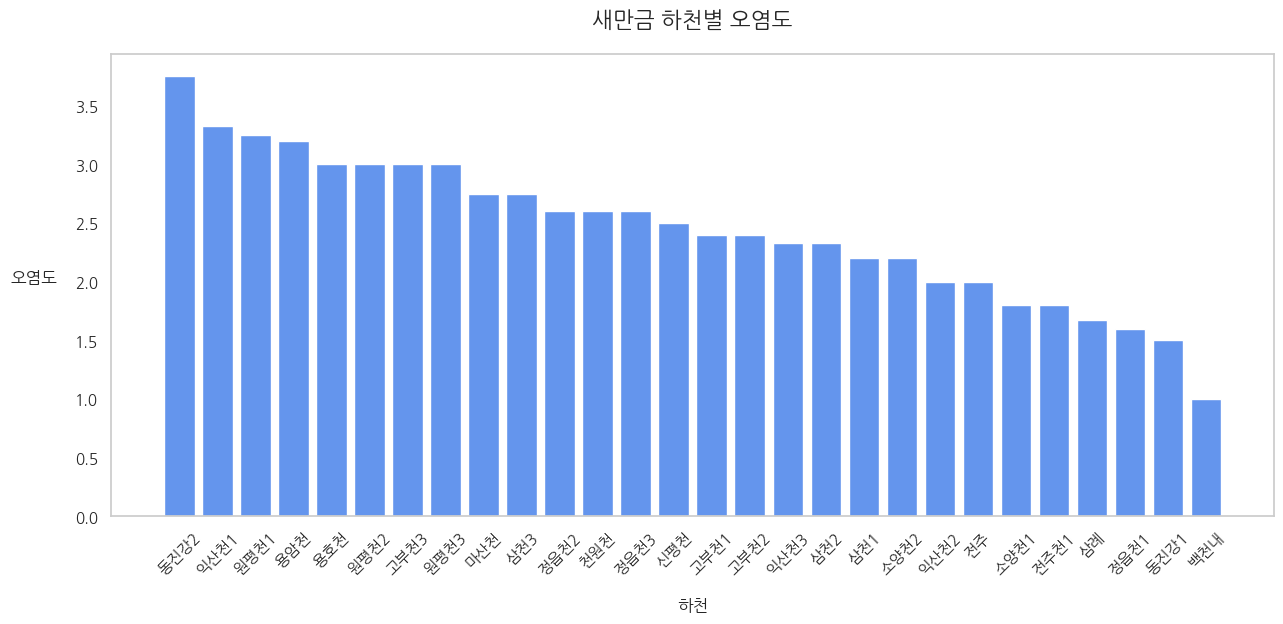

In [19]:
x = list(river_data["측정소명"])
y = list(river_data["오염도"])

plt.figure(figsize = (15, 6))
plt.bar(x, y, color='#6495ED')

plt.title('새만금 하천별 오염도', fontsize=16, pad=20)
plt.xticks(rotation=45)

plt.xlabel('하천', labelpad=15)
plt.ylabel('오염도', labelpad=30, rotation=0)

plt.grid(False)
plt.savefig('pollution_bar.png', dpi=300, bbox_inches='tight')
plt.show()
